In [1]:
file=r'/home/siddarth.jha@npci.org.in/Documents/Training/Data/insurance.csv'

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
from mypipes import *

In [5]:
in_train=pd.read_csv(file)

In [6]:
in_train.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
cat_vars=['sex','region','smoker']
num_vars=['age','bmi','children']

In [8]:
p1=pdPipeline([
    ('cat_select',VarSelector(cat_vars)),
    ('missing_trt',DataFrameImputer()),
    ('create_dummies',get_dummies_Pipe(15))
])

p2=pdPipeline([
    ('num_select',VarSelector(num_vars)),
    ('missing_trt',DataFrameImputer())
])

data_pipe=FeatureUnion([
    ('cat_pipe',p1),
    ('num_pipe',p2)
])

In [9]:
x_train=pd.DataFrame(data=data_pipe.fit_transform(in_train),
                     columns=data_pipe.get_feature_names())

In [10]:
y_train=in_train['charges']

In [1]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import RandomizedSearchCV

In [12]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.5f} (std: {1:.5f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [3]:
RandomForestRegressor?

## Decision Trees

In [13]:
params={ 
        'max_depth':[None,5,10,15,20,30,50,70],
            'min_samples_leaf':[1,2,5,10,15,20], 
            'min_samples_split':[2,5,10,15,20]
       }

In [14]:
reg=DecisionTreeRegressor()

In [15]:
random_search=RandomizedSearchCV(reg,
                                 cv=10,
                                 param_distributions=params,
                                 scoring='neg_mean_absolute_error',
                                 n_iter=10,n_jobs=-1,verbose=20
                                    )

In [16]:
random_search.fit(x_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:  

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'max_depth': [None, 5, 10, 15, 20, 30, 50, 70], 'min_samples_leaf': [1, 2, 5, 10, 15, 20], 'min_samples_split': [2, 5, 10, 15, 20]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='neg_mean_absolute_error',
          verbose=20)

In [17]:
report(random_search.cv_results_,5)

Model with rank: 1
Mean validation score: -2673.81782 (std: 310.91265)
Parameters: {'min_samples_split': 20, 'min_samples_leaf': 15, 'max_depth': 70}

Model with rank: 2
Mean validation score: -2673.81782 (std: 310.91265)
Parameters: {'min_samples_split': 10, 'min_samples_leaf': 15, 'max_depth': None}

Model with rank: 3
Mean validation score: -2680.07083 (std: 295.50348)
Parameters: {'min_samples_split': 2, 'min_samples_leaf': 20, 'max_depth': 15}

Model with rank: 4
Mean validation score: -2756.89728 (std: 337.86321)
Parameters: {'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 70}

Model with rank: 5
Mean validation score: -2764.89098 (std: 342.53671)
Parameters: {'min_samples_split': 15, 'min_samples_leaf': 1, 'max_depth': 50}



## Random Forest


In [18]:
param_dist = {"n_estimators":[50,100,200],
              "max_features": [2,4,5,6,8],
              "bootstrap": [True, False],
                'max_depth':[None,5,10,15,20,30,50,70],
                'min_samples_leaf':[1,2,5,10,15,20], 
                'min_samples_split':[2,5,10,15,20]
                  }

In [19]:
reg=RandomForestRegressor()

In [20]:
n_iter_search = 10
random_search=RandomizedSearchCV(reg,
                                 cv=10,
                                 param_distributions=param_dist,
                                 scoring='neg_mean_absolute_error',
                                 n_iter=10,n_jobs=-1,verbose=20
                                    )

random_search.fit(x_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.6s
[Paralle

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'n_estimators': [50, 100, 200], 'max_features': [2, 4, 5, 6, 8], 'bootstrap': [True, False], 'max_depth': [None, 5, 10, 15, 20, 30, 50, 70], 'min_samples_leaf': [1, 2, 5, 10, 15, 20], 'min_samples_split': [2, 5, 10, 15, 20]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='neg_mean_absolute_error',
          verbose=20)

In [21]:
report(random_search.cv_results_,5)

Model with rank: 1
Mean validation score: -2510.34889 (std: 273.05349)
Parameters: {'n_estimators': 100, 'min_samples_split': 15, 'min_samples_leaf': 10, 'max_features': 6, 'max_depth': 70, 'bootstrap': False}

Model with rank: 2
Mean validation score: -2530.34725 (std: 254.28321)
Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 15, 'max_features': 5, 'max_depth': None, 'bootstrap': False}

Model with rank: 3
Mean validation score: -2531.68952 (std: 262.42165)
Parameters: {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 15, 'max_features': 6, 'max_depth': 50, 'bootstrap': True}

Model with rank: 4
Mean validation score: -2553.40941 (std: 224.65589)
Parameters: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 4, 'max_depth': None, 'bootstrap': False}

Model with rank: 5
Mean validation score: -2646.17670 (std: 246.96772)
Parameters: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 15, 'max_f

## Extra Trees

In [22]:
param_dist = {"n_estimators":[50,100,200],
              "max_features": [2,4,5,6,8],
              "bootstrap": [True, False],
                'max_depth':[None,5,10,15,20,30,50,70],
                'min_samples_leaf':[1,2,5,10,15,20], 
                'min_samples_split':[2,5,10,15,20]
                  }

In [23]:
reg=ExtraTreesRegressor()

In [24]:
n_iter_search = 10
random_search=RandomizedSearchCV(reg,
                                 cv=10,
                                 param_distributions=param_dist,
                                 scoring='neg_mean_absolute_error',
                                 n_iter=10,n_jobs=-1,verbose=20
                                    )

random_search.fit(x_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1175s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elap

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'n_estimators': [50, 100, 200], 'max_features': [2, 4, 5, 6, 8], 'bootstrap': [True, False], 'max_depth': [None, 5, 10, 15, 20, 30, 50, 70], 'min_samples_leaf': [1, 2, 5, 10, 15, 20], 'min_samples_split': [2, 5, 10, 15, 20]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='neg_mean_absolute_error',
          verbose=20)

In [25]:
report(random_search.cv_results_,5)

Model with rank: 1
Mean validation score: -2769.36734 (std: 227.73905)
Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 4, 'max_depth': 10, 'bootstrap': False}

Model with rank: 2
Mean validation score: -3106.47434 (std: 251.55017)
Parameters: {'n_estimators': 100, 'min_samples_split': 20, 'min_samples_leaf': 10, 'max_features': 5, 'max_depth': 50, 'bootstrap': False}

Model with rank: 3
Mean validation score: -3111.03385 (std: 263.45324)
Parameters: {'n_estimators': 200, 'min_samples_split': 20, 'min_samples_leaf': 10, 'max_features': 6, 'max_depth': 15, 'bootstrap': True}

Model with rank: 4
Mean validation score: -3121.18522 (std: 248.63720)
Parameters: {'n_estimators': 100, 'min_samples_split': 15, 'min_samples_leaf': 10, 'max_features': 6, 'max_depth': 20, 'bootstrap': True}

Model with rank: 5
Mean validation score: -3286.66548 (std: 277.53722)
Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 10, 'max_fe

## Feature Importance for extratrees 
#### can be doen for other algos the same as well

In [26]:
et=random_search.best_estimator_
et.fit(x_train,y_train)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=10,
          max_features=4, max_leaf_nodes=None, min_impurity_decrease=0.0,
          min_impurity_split=None, min_samples_leaf=1, min_samples_split=5,
          min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

In [27]:
feat_imp_df=pd.DataFrame({'features':x_train.columns,'importance':et.feature_importances_})

feat_imp_df.sort_values('importance',ascending=False)

,features,importance
4,cat_pipe__smoker_no,0.720057
6,num_pipe__bmi,0.123873
5,num_pipe__age,0.117416
7,num_pipe__children,0.016696
1,cat_pipe__region_southeast,0.006386
0,cat_pipe__sex_male,0.006051
2,cat_pipe__region_northwest,0.004809
3,cat_pipe__region_southwest,0.004712


## Partial Dependence Plot for Extratrees



In [28]:
%matplotlib inline

In [29]:
var_name='num_pipe__bmi'

preds=et.predict(x_train)


In [30]:
var_data=pd.DataFrame({'var':x_train[var_name],'response':preds})

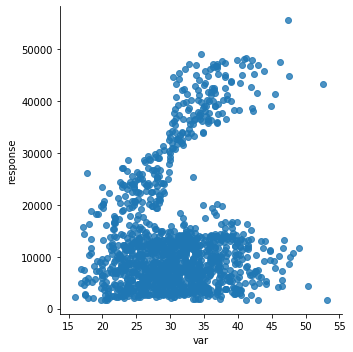

In [31]:
import seaborn as sns

sns.lmplot(x='var',y='response',data=var_data,fit_reg=False)

In [32]:
import statsmodels.api as sm
smooth_data=sm.nonparametric.lowess(var_data['response'],var_data['var'])

# smooth_data

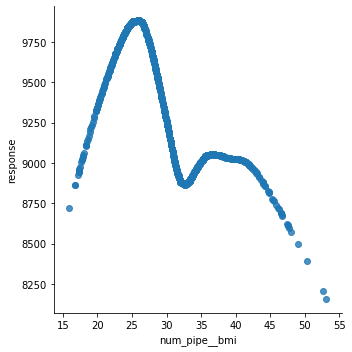

In [33]:
df=pd.DataFrame({'response':smooth_data[:,1],var_name:smooth_data[:,0]})

sns.lmplot(x=var_name,y='response',data=df,fit_reg=False)

In [1]:
from sklego.meta import ZeroInflatedRegressor


In [2]:
ZeroInflatedRegressor?